<a href="https://colab.research.google.com/github/Offliners/Deep-Learning-note/blob/main/3.6-classifying-newswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**載入路透社資料集**

In [75]:
from keras.datasets import reuters  # 從keras.datasets套件中匯入reuters資料集

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)  # 從reuters資料集中讀取訓練資料、訓練標籤、測試資料、測試標籤

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


**回到文字解碼新聞專欄**

In [76]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (value, key) in word_index.items()])

# 這些索引值有位移3個位置，因為0，1與2分別是保留索引值，代表「填補」、「開始位置」與「未知」
decoded_newwire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

**將資料加以編碼**

In [77]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.  # 進行one-hot編碼
  
  return results

x_train = vectorize_sequences(train_data)  # 將訓練資料向量化
x_test = vectorize_sequences(test_data)  # 將測試資料向

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

**模型定義**

In [78]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

**編譯模型**

In [79]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

**切片驗證資料集**

In [80]:
x_val = x_train[:1000]
partical_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partical_y_train = one_hot_train_labels[1000:]

**訓練模型**

In [81]:
history = model.fit(partical_x_train,
                    partical_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 72ms/step - loss: 3.1169 - acc: 0.3698 - val_loss: 1.7287 - val_acc: 0.6510
Epoch 2/20
16/16 [==============================] - 1s 46ms/step - loss: 1.4665 - acc: 0.7046 - val_loss: 1.2734 - val_acc: 0.7180
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 1.0536 - acc: 0.7766 - val_loss: 1.0990 - val_acc: 0.7700
Epoch 4/20
16/16 [==============================] - 1s 47ms/step - loss: 0.8301 - acc: 0.8246 - val_loss: 0.9986 - val_acc: 0.7960
Epoch 5/20
16/16 [==============================] - 1s 47ms/step - loss: 0.6477 - acc: 0.8647 - val_loss: 0.9415 - val_acc: 0.8090
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 0.5220 - acc: 0.8918 - val_loss: 0.9124 - val_acc: 0.8080
Epoch 7/20
16/16 [==============================] - 1s 47ms/step - loss: 0.4082 - acc: 0.9184 - val_loss: 0.9017 - val_acc: 0.8150
Epoch 8/20
16/16 [==============================] - 1s 48ms/step - loss: 0.3386 - a

**繪製訓練和驗證的損失圖**

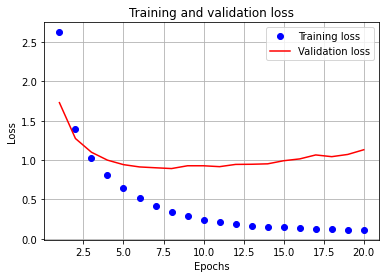

In [82]:
import matplotlib.pyplot as plt

loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

**繪製訓練和驗證的準確度**

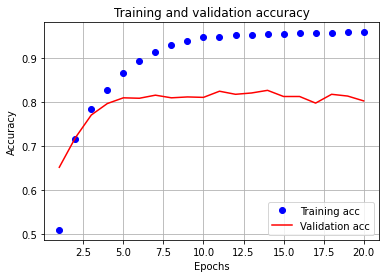

In [83]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

**從頭開始重新訓練模型**

In [84]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(partical_x_train,
                    partical_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

print(results)

Epoch 1/9
16/16 [==============================] - 1s 57ms/step - loss: 3.1071 - acc: 0.4219 - val_loss: 1.7045 - val_acc: 0.6570
Epoch 2/9
16/16 [==============================] - 1s 47ms/step - loss: 1.5152 - acc: 0.6973 - val_loss: 1.3025 - val_acc: 0.7130
Epoch 3/9
16/16 [==============================] - 1s 48ms/step - loss: 1.0893 - acc: 0.7736 - val_loss: 1.1385 - val_acc: 0.7560
Epoch 4/9
16/16 [==============================] - 1s 47ms/step - loss: 0.8640 - acc: 0.8228 - val_loss: 1.0201 - val_acc: 0.7770
Epoch 5/9
16/16 [==============================] - 1s 46ms/step - loss: 0.6761 - acc: 0.8646 - val_loss: 0.9577 - val_acc: 0.7930
Epoch 6/9
16/16 [==============================] - 1s 47ms/step - loss: 0.5654 - acc: 0.8845 - val_loss: 0.9108 - val_acc: 0.8110
Epoch 7/9
16/16 [==============================] - 1s 47ms/step - loss: 0.4451 - acc: 0.9102 - val_loss: 0.9189 - val_acc: 0.8050
Epoch 8/9
16/16 [==============================] - 1s 47ms/step - loss: 0.3485 - acc: 0.92